###Importing the Required packages



In [47]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [48]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading the Data into Data Frame df


In [78]:
file_path = '/content/drive/MyDrive/data/bank-full.csv'

# Read the file content
with open(file_path, 'r') as file:
    content = file.read()

# Replace semicolons with commas and remove quotes
content = content.replace(';', ',').replace('"', '')

# Write the processed content to a new file
new_file_path = '/content/drive/MyDrive/data/bank-full.csv'
with open(new_file_path, 'w') as file:
    file.write(content)

# Read the new CSV file with pandas
df = pd.read_csv(new_file_path)

# Display the first few rows of the DataFrame
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [79]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [80]:
null_values = df.isnull().sum() #check for null values in each column
print(null_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [81]:
df.describe()
df.shape

(45211, 17)

In [120]:
# Select the relevant columns

X= df[['age', 'marital', 'loan', 'duration']].values
X

array([[58, 'married', 'no', 261],
       [44, 'single', 'no', 151],
       [33, 'married', 'yes', 76],
       ...,
       [72, 'married', 'no', 1127],
       [57, 'married', 'no', 508],
       [37, 'married', 'no', 361]], dtype=object)

In [83]:
import numpy as np
from sklearn import preprocessing
marital = preprocessing.LabelEncoder()
marital.fit(['married','single','divorce'])
X[:,1] = marital.transform(X[:,1])


loan = preprocessing.LabelEncoder()
loan.fit([ 'yes','no'])
X[:,2] = loan.transform(X[:,2])

X

array([[58, 1, 0, 261],
       [44, 2, 0, 151],
       [33, 1, 1, 76],
       ...,
       [72, 1, 0, 1127],
       [57, 1, 0, 508],
       [37, 1, 0, 361]], dtype=object)

In [84]:
y = df[['y']].values
y

array([['no'],
       ['no'],
       ['no'],
       ...,
       ['yes'],
       ['no'],
       ['no']], dtype=object)

##Setting up the Decision Tree

In [85]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=25)

In [86]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))


Shape of X training set (36168, 4) &  Size of Y training set (36168, 1)


##Modeling

In [87]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [88]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

##Prediction

In [89]:
predTree = drugTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

['no' 'no' 'no' 'yes' 'no']
[['no']
 ['no']
 ['no']
 ['yes']
 ['no']]


In [90]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8911865531350216


##The accuracy is 0.89% only so we try to add some more attribute to traning and predict the output

In [199]:
X1= df[['age', 'marital', 'loan', 'duration','default','housing','education']].values
X1



array([[58, 'married', 'no', ..., 'no', 'yes', 'tertiary'],
       [44, 'single', 'no', ..., 'no', 'yes', 'secondary'],
       [33, 'married', 'yes', ..., 'no', 'yes', 'secondary'],
       ...,
       [72, 'married', 'no', ..., 'no', 'no', 'secondary'],
       [57, 'married', 'no', ..., 'no', 'no', 'secondary'],
       [37, 'married', 'no', ..., 'no', 'no', 'secondary']], dtype=object)

In [200]:
import numpy as np
from sklearn import preprocessing

marital = preprocessing.LabelEncoder()
marital.fit(['married','single','divorce'])
X1[:,1] = marital.transform(X1[:,1])


loan = preprocessing.LabelEncoder()
loan.fit([ 'yes','no'])
X1[:,2] = loan.transform(X1[:,2])

default =preprocessing.LabelEncoder()
default.fit(['no','yes'])
X1[:,4] = default.transform(X1[:,4])

housing =preprocessing.LabelEncoder()
housing.fit(['no','yes'])
X1[:,5] = housing.transform(X1[:,5])

education = preprocessing.LabelEncoder()
education.fit(['tertiary','secondary','primary','unknown'])
X1[:,6] = education.transform(X1[:,6])


X1

array([[58, 1, 0, ..., 0, 1, 2],
       [44, 2, 0, ..., 0, 1, 1],
       [33, 1, 1, ..., 0, 1, 1],
       ...,
       [72, 1, 0, ..., 0, 0, 1],
       [57, 1, 0, ..., 0, 0, 1],
       [37, 1, 0, ..., 0, 0, 1]], dtype=object)

In [201]:
y1 = df[['y']].values
y1

array([['no'],
       ['no'],
       ['no'],
       ...,
       ['yes'],
       ['no'],
       ['no']], dtype=object)

In [211]:
from sklearn.model_selection import train_test_split

X1_trainset, X1_testset, y1_trainset, y1_testset = train_test_split(X1, y1, test_size=0.2, random_state=25)

print('Shape of X training set {}'.format(X1_trainset.shape),'&',' Size of Y training set {}'.format(y1_trainset.shape))


Shape of X training set (36168, 7) &  Size of Y training set (36168, 1)


In [212]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree # it shows the default parameters
drugTree.fit(X1_trainset,y1_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [213]:
predTree = drugTree.predict(X1_testset)
print (predTree [0:5])
print (y1_testset [0:5])

['no' 'no' 'no' 'yes' 'no']
[['no']
 ['no']
 ['no']
 ['yes']
 ['no']]


In [214]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8929558774742895


##By Adding two more variables the accuracy has got just incresed by 0.001 % so  we shall proceed to the next step

##Visualization

In [206]:
!pip install pydotplus
!pip install python-graphviz


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


##We are just Showing a decision tree for "Duration" alone

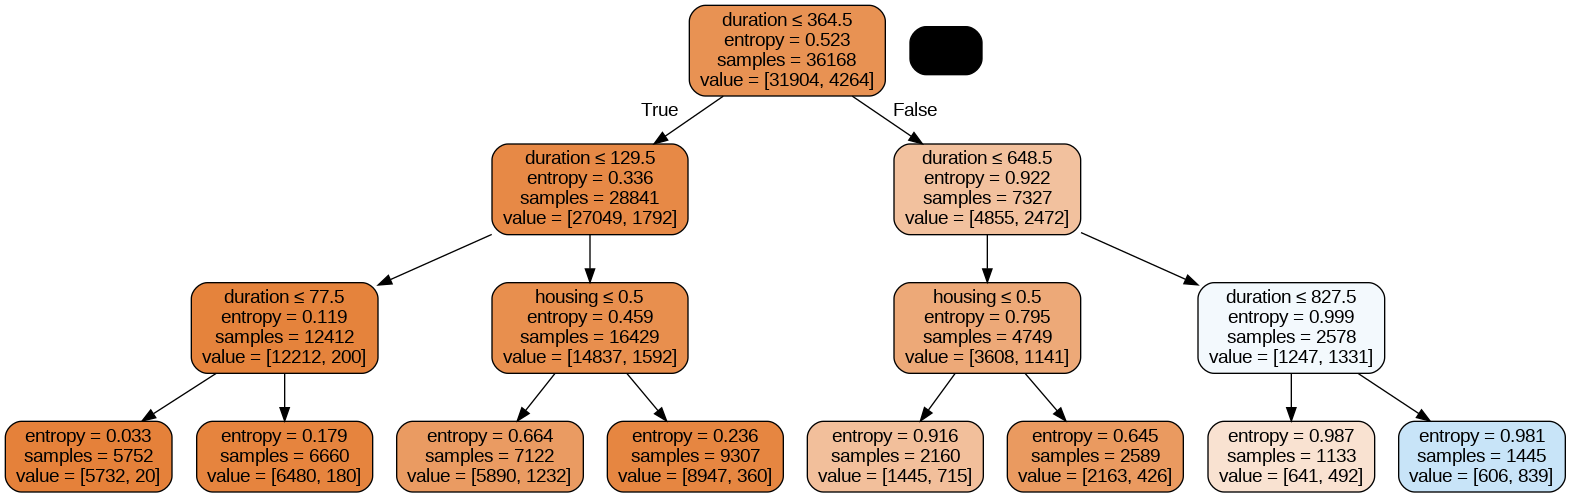

In [216]:
from sklearn.tree import export_graphviz
import os
import pydotplus
from IPython.display import Image

# Export the decision tree to a dot file
dot_data = export_graphviz(drugTree, out_file=None,
                           filled=True, rounded=True,
                           special_characters=True,
                           feature_names=['age', 'marital', 'loan', 'duration','default','housing','education'])

# Create the graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Set parameters for a better visualization
graph.set_graph_defaults(fontname='Arial')
graph.set_node_defaults(shape='ellipse', fontsize=10, fontname='Arial', penwidth=0.5)
graph.set_edge_defaults(color='blue', arrowhead='vee', arrowsize=0.5)

# Save the graph as a PNG image
graph.write_png("tree.png")

# Display the PNG image with a larger size
Image("tree.png", width=5000, height=1000)
